<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install seaborn

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


In [4]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts


import pandas as pd

# Specify the path to your CSV file
csv_path = 'dataset.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

df.head(2)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000


In [5]:
# Identify the columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]

# Fill the missing values with the average of each column
df[columns_with_missing_values] = df[columns_with_missing_values].fillna(df.mean())

df.head(2)

<ipython-input-5-b339a92f5f43>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[columns_with_missing_values] = df[columns_with_missing_values].fillna(df.mean())


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000


In [7]:
# Identify the duplicates in the DataFrame
duplicates = df[df.duplicated()]

# Drop the duplicates from the DataFrame
df = df.drop_duplicates()

df.head(2)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000


In [9]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Sort the correlation matrix by the correlation with 'Price' in descending order
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)

# Select the top 5 attributes with the highest correlation with 'Price'
top_5_attributes = correlation_with_price[1:6]

# Print the top 5 attributes
print(top_5_attributes)

<ipython-input-9-19f1593bc325>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


year          0.635715
engineSize    0.411451
tax           0.405970
mpg          -0.346263
mileage      -0.530483
Name: price, dtype: float64


In [10]:

# Count the number of cars for each unique fuelType
car_count_by_fuel_type = df['fuelType'].value_counts()

# Print the count of cars for each unique fuelType
print(car_count_by_fuel_type)


Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64


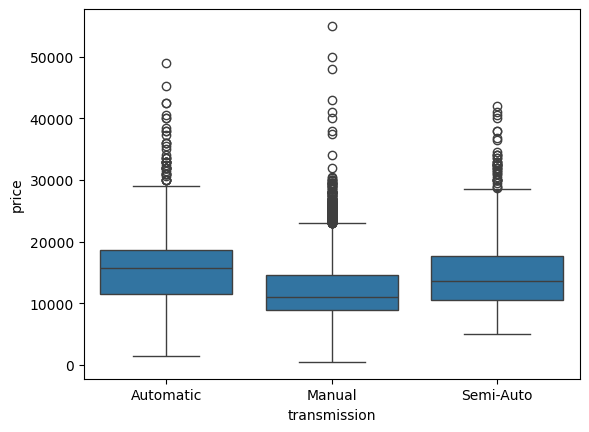

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot using seaborn
sns.boxplot(x='transmission', y='price', data=df)

# Show the plot
plt.show()

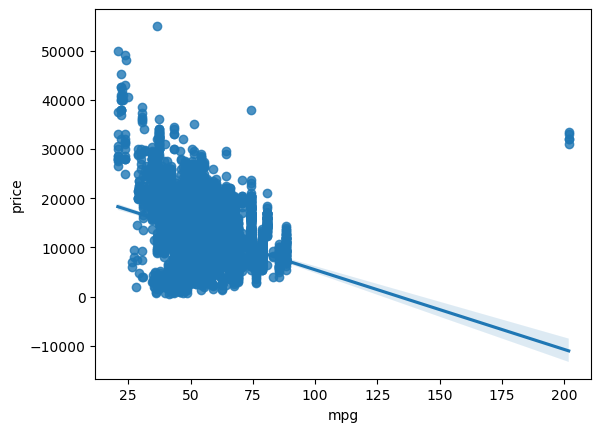

In [15]:
#Generate a regression plot using seaborn 
sns.regplot(x='mpg', y='price', data=df)

# Show the plot
plt.show()

#### Model Development and Evaluation

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Create the feature matrix X and target variable y
X = df[['mpg']]
y = df['price']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Compute R^2 score
r2 = r2_score(y, y_pred)

# Compute mean squared error (MSE)
mse = mean_squared_error(y, y_pred)

# Print R^2 and MSE
print("R^2 Score:", r2)
print("Mean Squared Error:", mse)

R^2 Score: 0.1198980224962416
Mean Squared Error: 19741690.809446193


In [18]:
from sklearn.model_selection import train_test_split

# Create the feature matrix X and target variable y
X = df[['mpg', 'engineSize', 'year', 'mileage', 'tax']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute R^2 score
r2 = r2_score(y_test, y_pred)

# Compute mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print R^2 and MSE
print("R^2 Score:", r2)
print("Mean Squared Error:", mse)

R^2 Score: 0.6917125923765307
Mean Squared Error: 6912744.910760718


In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Create the feature matrix X and target variable y
X = df[['mpg', 'engineSize', 'year', 'mileage', 'tax']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    LinearRegression()
)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Compute R^2 score
r2 = r2_score(y_test, y_pred)

# Compute mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print R^2 and MSE
print("R^2 Score:", r2)
print("Mean Squared Error:", mse)

R^2 Score: 0.1212280714716979
Mean Squared Error: 19704749.61492052


In [21]:
from sklearn.linear_model import Ridge

#Prepare the data by splitting it into independent variables (X) and the dependent variable (y). 
X = df[['mpg', 'engineSize', 'year', 'mileage', 'tax']]
y = df['price']

#Split the data into training and testing sets such that 20% of data makes up the testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a Ridge Regression model with a regularization parameter of 0.1 and fit it to the training data
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

#Make predictions on the test data
y_test_pred = model.predict(X_test)

#Evaluate the model using R²
r2 = r2_score(y_test, y_test_pred)
print('R-squared: ', r2)






R-squared:  0.6917134446113082


In [23]:
#Prepare the data by splitting it into independent variables (X) and the dependent variable (y). 
X = df[['mpg', 'engineSize', 'year', 'mileage', 'tax']]
y = df['price']

#Split the data into training and testing sets such that 20% of data makes up the testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Perform a second order polynomial transform on both the training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


#Create a Ridge Regression model with a regularization parameter of 0.1 and fit it to the training data
model = Ridge(alpha=0.1)
model.fit(X_train_poly, y_train)

#Make predictions on the test data
y_test_pred = model.predict(X_test_poly)

#Evaluate the model using R² and MSE
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print('MSE: ', mse)
print('R-squared: ', r2)


/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MSE:  7326174.515450991
R-squared:  0.6732748888723327


In [ ]:
from sklearn.linear_model import Ridge

#Prepare the data by splitting it into independent variables (X) and the dependent variable (y). 
X = df[['mpg', 'engineSize', 'year', 'mileage', 'tax']]
y = df['price']

#Split the data into training and testing sets such that 20% of data makes up the testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Perform a second order polynomial transform on both the training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


#Set up the parameter grid for the Grid Search
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

#Initialize the Grid Search object with Ridge Regression and the parameter grid, and specify 4-fold cross-validation
grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=4)

#Fit the Grid Search object to the transformed training data
grid_search.fit(X_train_poly, y_train)

#Get the optimal alpha value
optimal_alpha = grid_search.best_params_['alpha']
print('Optimal alpha: ', optimal_alpha)


#Create a Ridge Regression model with a regularization parameter of 0.1 and fit it to the training data
model = Ridge(alpha=optimal_alpha)
model.fit(X_train_poly, y_train)

#Make predictions on the test data
y_test_pred = model.predict(X_test_poly)

#Evaluate the model using R² and MSE
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print('MSE: ', mse)
print('R-squared: ', r2)




## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
